###**Dataset**

Dataset Link: https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv

**About the dataset:**

The Facebook Live Sellers in Thailand is a dataset curated in UCI Machine Learning Datasets. It data contains 7050 observations and twelve attributes. In this assignment, the preprocessed dataset contains 7050 instances and 10 attributes. The details of the attributes are as follows:

* status_type: The type of shared status
* num_reactions: Number of glimpses over a shared status by viewers
* num_comments: Number of comments on that particular shared status
* num_shares: Toal number of shares by peers
* num_likes: Number of likes on the post
* num_loves: Number of love emojis of that shared post
* num_wows: Number of wow emojis on that post
* num_hahas: Number of haha emojis on that post
* num_sads: Number of sad emojis on that post
* num_angrys: Number of angry emojis on that post

### **Task 1: Data loading and Data Analysis**

* Load the data file into a dataframe object : df
* Display the first 5 observation of the dataset
* Display a concise summary of the provided data and list out 2 observations/inferences that you observe from the result. You can use the info() method for this.
* Perform EDA viz. Is there any missing values in each column of the provided dataset
* Display all the unique status_type of the dataframe
* Convert categorical variable, i.e., status_type into numerical representation using a label encoder

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Live_20210128.csv to Live_20210128.csv


In [ ]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Live_20210128.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

observations

1. total 7050 entries in a dataframe.
2. status_published columns contains date and time, which has data_type as object.

In [ ]:
df.status_type.unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [ ]:
# LabelEncoding of status_type feature.

from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

df.status_type = encode.fit_transform(df['status_type'])
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,3,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,1,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,3,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,1,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,1,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


All the unique values are concerted into 0,1,2,3.

In [ ]:
df.drop(['Column1','Column2','Column3','Column4'],axis = 1,inplace=True)

In [ ]:
# identifying the numerical_cols

numerical_cols = list(set(df.columns)-set(['status_id','status_published']))


### Performig EDA

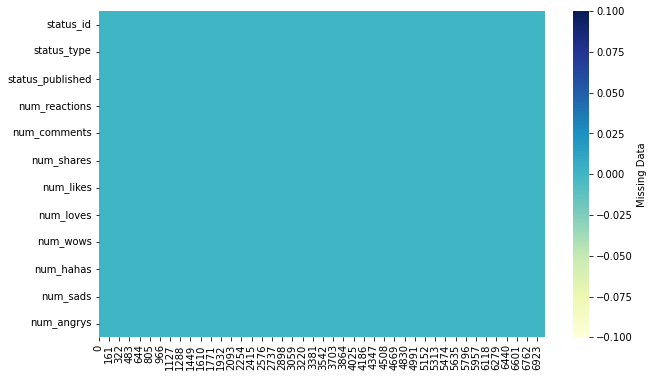

In [ ]:
# checking null values

plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

last four columna have missig values. and we're gonna remove them.

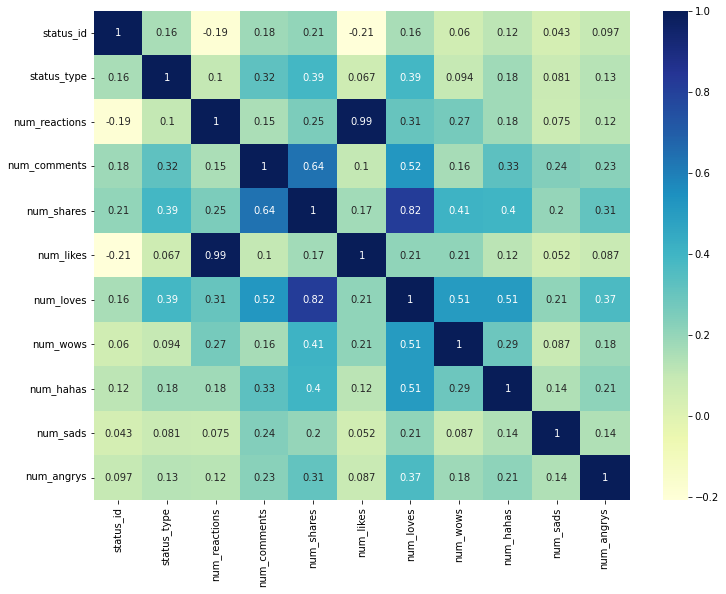

In [ ]:
# ploting correlation heatmap
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

correlation between num_likes and num_reactions are highest.
correlation 0.82 between num_loves and num_shares suggest that people tend to share when they loves the post.

###**Task 2: Feature Scaling**


*   Perform normalization to scale numerical data prior to modeling. You may use Min-max scaling technique
*   Use Elbow method to determine the number of cluster to be formed
*   Verify optimal number of clusers on the basis of silhouette scores
*   Assigning cluster label to each instance of the dataframe
*   Validating obtained clusters using external cluster validation approaches like rand_score and adjusted_rand_score


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df[numerical_cols] = scale.fit_transform(df[numerical_cols])

In [ ]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,1.000000,4/22/2018 6:00,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,2,0.333333,4/21/2018 22:45,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,3,1.000000,4/21/2018 6:17,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,4,0.333333,4/21/2018 2:29,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,5,0.333333,4/18/2018 3:22,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [ ]:
from sklearn.cluster import KMeans

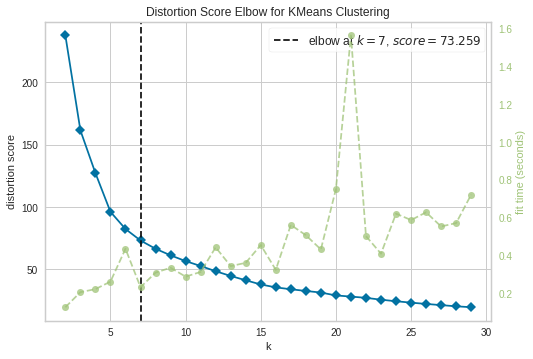

In [ ]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(df[numerical_cols])        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

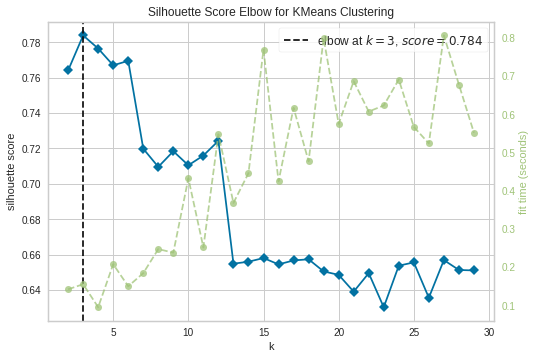

In [ ]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(df[numerical_cols])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Elbow method says the optimal number of cluster as 7, but also it is pretty ambigous to find the elbow so, we will stick with the silhousett score observations as number of cluster as 3.

In [ ]:
# applying KMeans with clusters as 3.

model = KMeans(n_clusters = 3)
model.fit(df[numerical_cols])

labels = model.labels_
set(labels)

{0, 1, 2}

In [ ]:
# Assigning cluster label to the data points
df['clusters'] = list(labels)
df.drop(['status_published','status_id'],axis = 1,inplace = True)

In [ ]:
# Validating obtained clusters using external cluster validation approaches like rand_score and adjusted_rand_score

from sklearn.model_selection import train_test_split
X = df.drop(['clusters'],axis = 1)
y = df.clusters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model_trained = KMeans(n_clusters = 3)
model_trained.fit(X_test)
test_labels = model_trained.labels_


from sklearn.metrics import rand_score
rand_score(y_test, test_labels)


1.0

###**Task 3: Perform PCA on Fruit Dataset**

Fruit Dataset Link: https://raw.githubusercontent.com/dphi-official/Datasets/master/fruit_data.csv

* Use PCA to find the first two principal components of the fruit dataset
* Scale the value. Each feature should be centered (zero mean) and with unit variance
* Analysis - perform PCA with 4 components and print their explained variance_ratio



In [ ]:
df2 = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/fruit_data.csv")

In [ ]:
df2.head()

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59
2,1,176,7.4,7.2,0.60
3,2,86,6.2,4.7,0.80
4,2,84,6.0,4.6,0.79


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 2)

In [ ]:
pca.fit(df2)

PCA(n_components=2)

In [ ]:
# finding first two principle components
pca.components_

array([[ 7.21640491e-04,  9.99801105e-01,  1.30294190e-02,
         1.50814711e-02, -1.11556357e-04],
       [ 7.62665550e-01, -7.77757544e-03, -1.68186136e-01,
         6.24292671e-01, -1.59013577e-02]])

In [ ]:
pca.explained_variance_ratio_

array([9.99082568e-01, 7.21661472e-04])

In [ ]:
# scaling the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2 = scaler.fit_transform(df2)

[0.46714596 0.31485849 0.16064024 0.04624694]


Text(0, 0.5, 'Cumulative explained variance')

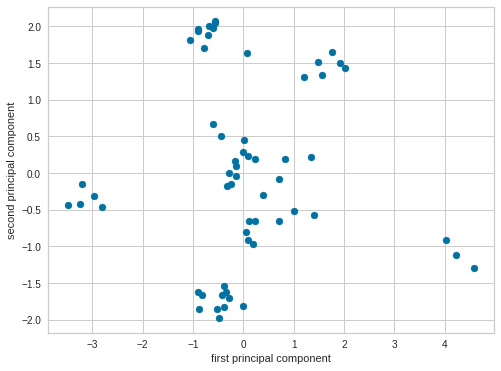

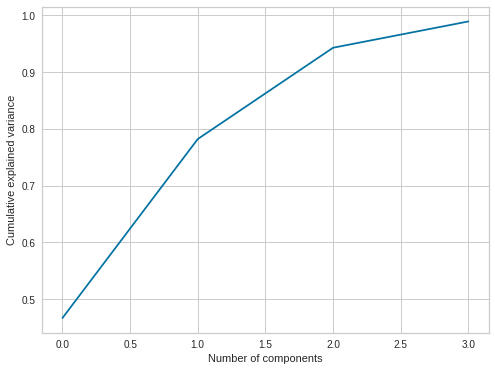

In [ ]:
# Analysis - perform PCA with 4 components and print their explained variance_ratio

pca4 = PCA(n_components=4)

pca_data = pca4.fit_transform(df2)


plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0],pca_data[:,1])
plt.xlabel('first principal component')
plt.ylabel('second principal component')

print(pca4.explained_variance_ratio_)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca4.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [ ]:
print(pca4.explained_variance_ratio_)

[0.46714596 0.31485849 0.16064024 0.04624694]
